let's say we want to measure a function along an axis, and we have the independent variables 0 and 1.
The function values are also 0 and 1: 0->0, 1->1.

We measure this with added noise, which is i.i.d between *pairs*, i.e:

$n_0=n_1 \sim \mathcal{N}(0,1) \\
n_2=n_3 \sim \mathcal{N}(0,1) \\
...$

what is the better way to measure?

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_avg = 80

The noise indeed repeats:

we have 2 ways of reshaping: Inner averaging loop and outer averaging loop.

## outer averaging loop

In [3]:
# here we take the data like this:
def get_dataset_ol(n_avg):
    meas_outer_loop = np.tile([0, 1,], n_avg)
    noise = np.repeat(np.random.randn(n_avg), 2)

    # and then reshape it:
    return np.reshape(meas_outer_loop + noise, (n_avg, 2))

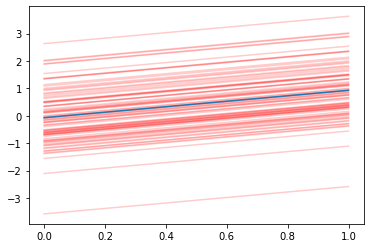

In [4]:
# the samples look like this
data_ol = get_dataset_ol(n_avg)
plt.plot(data_ol.T, 'r', alpha=0.2);
plt.plot(data_ol.mean(axis=0))

In [5]:
# differences - here the stdev is zero!

np.squeeze(np.diff(data_ol, axis=1)[:4])

array([1., 1., 1., 1.])

we estimate each of the points in the dataset as the sum. What is the stdev of this variable?

i.e we do this calculation:

$\hat{x}_i = \frac{1}{N}\sum_{k=0}^{N}{(x_i + n_{2k + i})} = x_i + \frac{1}{N}(\text{sum of N i.i.d variables}),\, i=0,1 \\
\sigma_{\hat{x}_i} = \rm{std}(\hat{x}_i)$

here every random number in the sum is i.i.d!

In [6]:
# we estimate each of the points in the dataset as the sum. What is the stdev of this variable?
np.array([get_dataset_ol(n_avg).mean(axis=0) for _ in range(1000)]).std(axis=0) * np.sqrt(n_avg)

array([1.02449432, 1.02449432])

answer: it is $\sigma_{\hat{x}_i} = \sigma_x / \sqrt{N} $

## Inner averaging loop

In [7]:
# here we take the data like this - the noise is still generated in the same way
def get_dataset_il(n_avg):
    meas_outer_loop = np.repeat([0, 1], n_avg)
    noise = np.repeat(np.random.randn(n_avg), 2)

    # and then reshape it:
    return np.reshape(meas_outer_loop + noise, (2, n_avg))

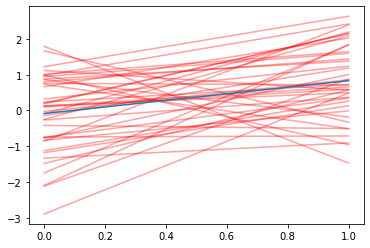

In [8]:
# the samples look like this
data_il = get_dataset_il(n_avg)
plt.plot(data_il, 'r', alpha=0.2);
plt.plot(data_il.mean(axis=1))

In [9]:
# here the differences are random:
np.squeeze(np.diff(data_il, axis=0))[:4]

array([1.44114662, 1.44114662, 1.78556681, 1.78556681])

we estimate each of the points in the dataset as the sum. What is the stdev of this variable?

i.e we do this calculation:

$\hat{x}_i = \frac{1}{N}\sum_{k=iN}^{(i+1)N}{(x_i + n_{k})} = x_i + \frac{2}{N}(\text{sum of N/2 i.i.d variables}),\, i=0,1 \\
\sigma_{\hat{x}_i} = \rm{std}(\hat{x}_i)$


In [10]:

np.array([get_dataset_il(n_avg).mean(axis=1) for _ in range(10000)]).std(axis=0)* np.sqrt(n_avg) / np.sqrt(2)

array([0.99920396, 1.01283208])

Answer: it is $\frac{2}{N}\sqrt{\frac{N}{2}}\sigma_x = \sqrt{\frac{2}{N}}\sigma_x$

# conclusion: The noise with the inner averaging loop is larger by a factor of \sqrt{2} in this example!

This is because if we sum over N i.i.d numbers, we get less noise than if we sum over N numbers which come in pairs of N/2 i.i.d numbers!!